In [1]:
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neural_network import BernoulliRBM

In [25]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [26]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [54]:
def gen_mnist_image(data):
  res = data[:200].reshape(20, -1, 28, 28)
  res = np.rollaxis(res, 0, 3) # move axis 0 to pos 2 = (-1, 28, 20, 28)
  return res.reshape(-1, 20 * 28) # return 280 * 560 image (10 rows 20 cols)

In [55]:
gen_mnist_image(x_train).shape

(280, 560)

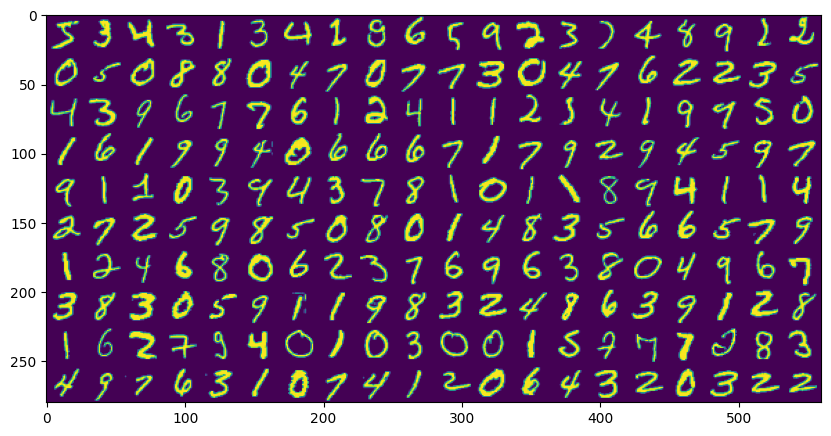

In [56]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(x_train));

In [30]:
rbm = BernoulliRBM(n_components=100, learning_rate=0.01, random_state=0, verbose=True)

In [32]:
rbm.fit(x_train.reshape(-1, 28 * 28)) # convert to 2D

[BernoulliRBM] Iteration 1, pseudo-likelihood = -112.67, time = 16.02s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -99.63, time = 16.49s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -92.60, time = 18.99s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -89.15, time = 20.80s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -86.47, time = 21.72s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -83.90, time = 16.15s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -83.19, time = 17.30s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -80.68, time = 18.01s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -80.31, time = 19.07s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -79.37, time = 16.36s


BernoulliRBM(learning_rate=0.01, n_components=100, random_state=0, verbose=True)

In [57]:
res = x_test[:40].copy().reshape(-1, 28*28)

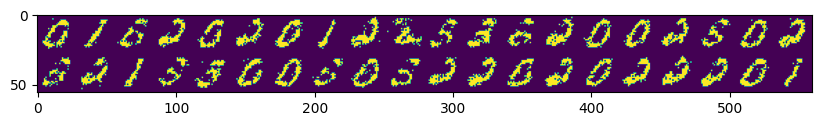

In [58]:
for i in range(1000):
  for n in range(40):
    res[n] = rbm.gibbs(res[n])
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(res))